In [ ]:
#Multiple Linear Regression

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
#Read The Dataset

import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

C:\Users\pandi\AppData\Local\Temp\ipykernel_19036\3066193974.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
#Seperating X & Y

X=df[['RND','ADMIN','MKT']]
Y=df[['PROFIT']]

In [11]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [15]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,Y)

LinearRegression()

In [16]:
#Check Intercept and coefficients
model.intercept_

array([50122.19298987])

In [17]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [18]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [20]:
#profit_pred=(50122+0.80xRND-0.026xADMIN+0.0272xMKT)
coef=pd.Series(model.coef_.flatten())
coef.index=X.columns
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'Linear Regre Model'}>

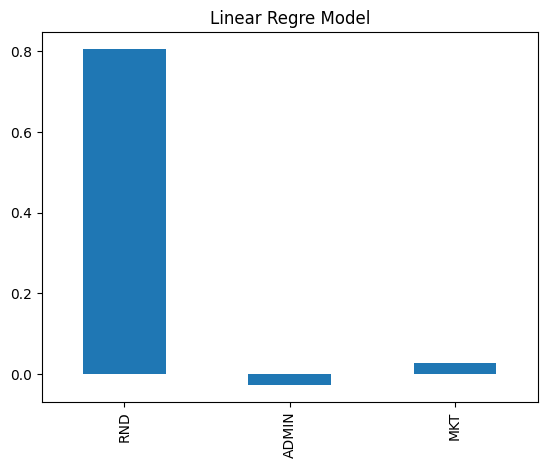

In [21]:
coef.plot(kind='bar',title='Linear Regre Model')

In [22]:
#Evaluate the model

#R2 score
model.score(X,Y)

0.9507459940683246

In [24]:
#Predict the results for X

ypredict=model.predict(X)
ypredict[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [25]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [ ]:
MSE,RMSE,MAE,R2

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y,ypredict)
mse

78417126.01913083

In [31]:
rmse=mse**(1/2)
rmse

8855.34448901514

In [32]:
mae=mean_absolute_error(Y,ypredict)
mae

6471.4503961048085

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypredict)
mape

0.10601209160494125

In [35]:
from sklearn.metrics import r2_score
r2=r2_score(Y,ypredict)
r2

0.9507459940683246

In [ ]:
#Above model is good and can be used out of sample predictions


In [37]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [38]:
xnew=[[100000,30000,50000]]
model.predict(xnew)

array([[131250.62216964]])